In [3]:
import numpy as np  
import pandas as pd  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [5]:
#train_test_split: It is used to divide the data into 2 parts Training(70%) and Test(30%)
#accuracy_score: Training data accuracy: We check the performance of the training dataset by applying it to the model
                #Test data accuracy: We check the performance of the test dataset by applying it to the model

In [7]:
#Predict Gender of the person based on height, weight, and shoe size
#here X is [Height,weight,shoe size] of 11 peoples.
#y is gender of the person
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40], [190, 90, 47], [175, 64, 39],[177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]
#here Y is dataset of gender of above 11 peoples
Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']
#X are features or independent variables
#Y is always denoted as a target variable

In [9]:
X

[[181, 80, 44],
 [177, 70, 43],
 [160, 60, 38],
 [154, 54, 37],
 [166, 65, 40],
 [190, 90, 47],
 [175, 64, 39],
 [177, 70, 40],
 [159, 55, 37],
 [171, 75, 42],
 [181, 85, 43]]

In [11]:
Y

['male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male']

In [13]:
print(type(X))
print(type(Y))

<class 'list'>
<class 'list'>


In [15]:
#we need to convert this list into array
X=np.array(X)
print(X.shape)
print(X)

(11, 3)
[[181  80  44]
 [177  70  43]
 [160  60  38]
 [154  54  37]
 [166  65  40]
 [190  90  47]
 [175  64  39]
 [177  70  40]
 [159  55  37]
 [171  75  42]
 [181  85  43]]


In [17]:
Y=np.array(Y)
print(Y.shape)
print(Y)

(11,)
['male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male']


In [11]:
#To create model
clf=DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [12]:
#To get the predictions
predictions=clf.predict(X)
predictions

array(['male', 'male', 'female', 'female', 'male', 'male', 'female',
       'female', 'female', 'male', 'male'], dtype='<U6')

In [13]:
#training accuracy-performance of the model tested using the same dataset used for building the model 
print("Accuracy:",accuracy_score(Y,predictions))
#As the predicted and real data is same thats why it is giving 100% accuracy
#When accuracy is 100% there can be problem of Overfitting

Accuracy: 1.0


In [14]:
#creating data frame from X and Y, X and Y both are array
df1=pd.DataFrame(np.column_stack( (X,Y) ) ) #like cbind function in R
df1

,0,1,2,3
0,181,80,44,male
1,177,70,43,male
2,160,60,38,female
3,154,54,37,female
4,166,65,40,male
5,190,90,47,male
6,175,64,39,female
7,177,70,40,female
8,159,55,37,female
9,171,75,42,male


In [15]:
#concatinating of dataframe and pd.Series() is used to convert List to Column which is known as Series in Pandas
#Series=Columns
#axis=1 Means to join the dataframes columnwise
newdf=pd.concat([df1,pd.Series(predictions)],axis=1)

In [16]:
newdf.columns=['X1', 'X2', 'X3', 'Actual class', "Predicted class"]
newdf

,X1,X2,X3,Actual class,Predicted class
0,181,80,44,male,male
1,177,70,43,male,male
2,160,60,38,female,female
3,154,54,37,female,female
4,166,65,40,male,male
5,190,90,47,male,male
6,175,64,39,female,female
7,177,70,40,female,female
8,159,55,37,female,female
9,171,75,42,male,male


In [19]:
!pip install graphviz

/Users/nikhiljain/.zshenv:1: command not found: Export


In [32]:
!pip install pydotplus

/Users/nikhiljain/.zshenv:1: command not found: Export


In [33]:
# Now create graphs (decision tree)
features=newdf.columns[0:3]
classes=newdf['Actual class'].unique()
print(features)
print(classes)

Index(['X1', 'X2', 'X3'], dtype='object')
['male' 'female']


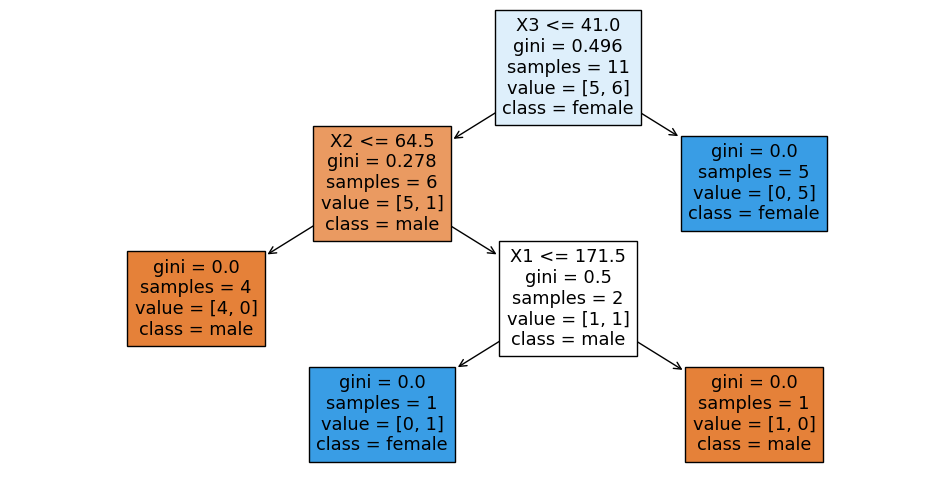

In [34]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=features, class_names=classes, filled=True)
plt.show()

## Example 2 iris dataset

In [36]:
loandata = pd.read_csv("/Users/nikhiljain/Symbiosis Sem-1/Data Mining/Datasets/bankloan_sol_data.csv")
#loandata['Loan_Status']=loandata['Loan_Status'].astype('category')

In [37]:
print(loandata.shape)
print(loandata.dtypes)

(700, 9)
Age               int64
Education         int64
Employment        int64
Address           int64
Income            int64
DebtToIncome    float64
CreditToDebt    float64
OtherDebt       float64
IsDefaulted       int64
dtype: object


In [38]:
loandata.head(5)

,Age,Education,Employment,Address,Income,DebtToIncome,CreditToDebt,OtherDebt,IsDefaulted
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [39]:
X=loandata.iloc[:,0:8]
X.head(5)

,Age,Education,Employment,Address,Income,DebtToIncome,CreditToDebt,OtherDebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564


In [41]:
Y=loandata.iloc[:,8]
Y.head(5)

0    1
1    0
2    0
3    0
4    1
Name: IsDefaulted, dtype: int64

In [42]:
#Use inbuilt function to split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=.25, stratify=Y)
print(X_train.shape)
print(X_test.shape)
#X: features
#Y: target variable
#random_state= to randomly pick the records for training and testing but it will be same when the value is passed to it is same
#test_size=25% is given to test data
#stratify=Y: will make sure the proportion of data distribution in test and training data is same and passing Y because it is our target var.

(525, 8)
(175, 8)


In [43]:
print(y_train.value_counts())
print(y_test.value_counts())
print(388/(388+137))
print(129/(129+46))
#to check the proportion of data distribution based on target variable

IsDefaulted
0    388
1    137
Name: count, dtype: int64
IsDefaulted
0    129
1     46
Name: count, dtype: int64
0.7390476190476191
0.7371428571428571


In [44]:
#creating the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#Checking the performance of test and training dataset
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))
#It is the case of overfitting as it is working very good on training data set but not on the test dataset and the 
#difference should not be more than 15%

accuracy on training set: 1.000000
accuracy on test set: 0.674286


In [46]:
#another way of checking train and test accuracy
loanpredictions1=tree.predict(X_train)
print("Accuracy on training set:",accuracy_score(y_train,loanpredictions1))
loanpredictions2=tree.predict(X_test)
print("Accuracy on test set:",accuracy_score(y_test,loanpredictions2))
#print("Accuracy on test set:",accuracy_score(loanpredictions2,y_test))#works

Accuracy on training set: 1.0
Accuracy on test set: 0.6742857142857143


In [47]:
#confusion Matrix
# IMPORTANT: first argument is actual values, second argument is predicted values
from sklearn import metrics
confusionmatrix=metrics.confusion_matrix(y_test,loanpredictions2)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]
#tn, fp, fn, tp = confusion_matrix returns values in this sequence

[[99 30]
 [27 19]]


In [48]:
#first row and column = negative = 0
#second row and column = positive = 1
#rows are actual
#cols are predicted
#there are 104 records in the dataset which are non-defaulters and my model has also predicted them as non-defaulters (True Negative, TN)
#there are 25 records in the dataset which are non-defaulters and my model has incorrectly predicted them as defaulters (False Positive, FP)
#there are 21 records in the dataset which are defaulters and my model has also predicted them as defaulters (True Positive, TP)
#there are 25 records in the dataset which are defaulters and my model has incorrectly predicted them as non-defaulters (False Negative, FN)
#Formula to find accuracy = TP+TN/(TP+TN+FN+FP)
#The above thing is done by accuracy_score() function

In [49]:
#Why we dont only look at accuracy score?
#There can be a situation where it is predicting half one of the attributes with very high accuracy but other attribute with very low accuracy
#which results in creating imbalance and it will lead to good avg accuracy score. So it is not a good choice to solely depend on the 
#the accuracy score
#Example
#Defaulters Prediction accuracy - 20%
#Non Defaulters Prediction accuracy - 94%
#Accuracy score - 87%
#There is a solution to improve and reduce the imbalance in the dataset but there would not be any high increase in the accuracy using
#those techniques only 5-10% accuracy can be achieved

In [57]:
#Sensitivity/True Positive Rate/Recall: How good your model is in predicting the true positive cases(best value 1)
#Formula=TP/P(P=Total Positive cases)
#Specificity/True Positive Rate: How good your model is in predicting the true negative cases(best value 1)
#Formula=TN/N(N=Total Negative cases)

In [67]:
#Precision: Out of total positive predictions how many are actual positive predictions(best value 1)
#Formula=TP/(TP+FP)
#False Positive Rate: The False Positive Rate is the proportion of actual negatives that are incorrectly classified as positives.(best value 1)
#Formula=FP/(FP+TN)
#False Negative Rate: The False Negative Rate is the proportion of actual positives that are incorrectly classified as negatives.(best value 1)
#Formula: FNR= FN/(TP+FN)

In [ ]:
#Single Value Major & Double Value Major(Explore this)

In [ ]:
#Lets suppose in a dataset there is column with 2 values Yes & No and Yes occurs 6 times and No occurs 4 times, the single value major is
#"Yes" as it is the most frequent class, appearing 6 times. The double value major includes both "Yes" and "No," the two most frequent
#classes with counts of 6 and 4, respectively. Single value major is useful for labeling
#leaf nodes in decision trees, while double value major aids in more nuanced decision-making, especially in imbalanced datasets.

In [ ]:
#Weighted TPRTNT
#Formula: Weighted TPR - TNR = (TPR+N/(P+N)) + (TNR+P/(P+N))